In [24]:
import gym
import numpy as np
import torch
import os
import random
from collections import deque
import matplotlib.pyplot as plt

from dqn_agent import Agent

In [26]:
env = gym.make('CartPole-v0')
env.reset()

array([-0.03068656, -0.02822661,  0.04020655,  0.00971028])

In [14]:
# number of actions
action_size = env.action_space.n
print('Number of actions:', action_size)

# examine the state space 
print('Observation space: ', env.observation_space)
state_size = len(env.state)
print('States look like:', env.state)
print('States have length:', state_size)

Number of actions: 2
Observation space:  Box(4,)
States look like: [-0.04882882 -0.00225633  0.03687457  0.0010926 ]
States have length: 4


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [16]:
def trainAgent(agent, n_episodes=2000, timeout=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, score_window_size=100, solution_score=195.0):
    print('\nTraining agent ')
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=score_window_size)  # last 'score_window_size' scores for candidate solution
    eps = eps_start                    # initialize epsilon
    
    for episode in range(n_episodes):
        state = env.reset()            # get the current state
        score = 0
        for t in range(timeout):
            # Query agent for action
            action = agent.act(state, eps)
            # Get feedback from environment
            next_state, reward, done, _ = env.step(action.item())                  # send the action to the environment
            
            # Move the agent a step
            agent.step(state, action, reward, next_state, done)

            score += reward                                    # update the score
            state = next_state                                 # roll over the state to next time step
            if done:                                           # exit loop if episode finished
                break
        
        # Cache the scores and decay epsilon
        scores.append(score)
        scores_window.append(score)
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        # Print episode results
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")

        # Print if solution score achieved
        if np.mean(scores_window)>=solution_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    
    print("\nTraining Completed!")
    return scores

In [30]:
def testAgent(pretrainedWeightsFile='checkpoint.pth'):
    print("Testing the Agent")
    agent = Agent(state_size, action_size, 0, pretrainedWeightsFile, train = False)
    state = env.reset()            # get the current state
    score = 0                                          # initialize the score
    while True:
        env.render()
        action = agent.act(state)                    # select an action
        next_state, reward, done, _ = env.step(action.item())           # send the action to the environment
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    print("Score: {}".format(score))
    env.close()
    return score

In [28]:
def plotScores(scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()


Training agent 
Episode 1399	Average Score: 195.00
Environment solved in 1299 episodes!	Average Score: 195.00

Training Completed!


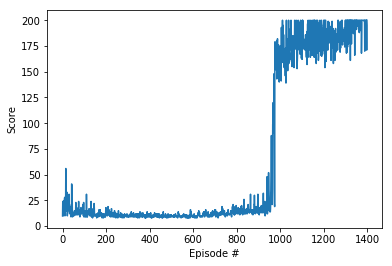

In [13]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = trainAgent (agent)
plotScores(scores)

In [35]:
testAgent(pretrainedWeightsFile='cartpole-checkpoint.pth')

Testing the Agent
Score: 200.0


200.0